In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

In [2]:
metricas = pd.read_excel('./metricas_NN.xlsx')

In [3]:
metricas = metricas.query('~RMSE_train.isna()')
metricas

,NN,epoch,RMSE_train,RMSE_test,RMSE_tot_train,RMSE_tot_test
0,inicial,50000,0.7,3.1,39.2,173.6
1,5(cont),50000,1.5,6.0,84.0,336.0
2,5,50000,1.7,5.9,95.2,330.4
3,5,100000,1.5,7.1,84.0,397.6
4,5,150000,1.4,4.4,78.4,246.4
5,10(cont),50000,1.9,5.5,106.4,308.0
6,10,50000,2.1,4.0,117.6,224.0
7,10,100000,1.8,3.7,100.8,207.2
9,15(cont),50000,1.7,6.9,95.2,386.4
10,15,50000,2.0,2.9,112.0,162.4


In [4]:
def plot_RSME(RSME : str, ax):
    sns.barplot(data=metricas, x='NN', y=RSME,hue='epoch', palette='rainbow',ax = ax)
    ax.get_legend().remove()
    ax.axhline(y=metricas.iloc[0][RSME], color='black', linestyle='--')
    ax.grid()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax = plt.gca()
    return ax


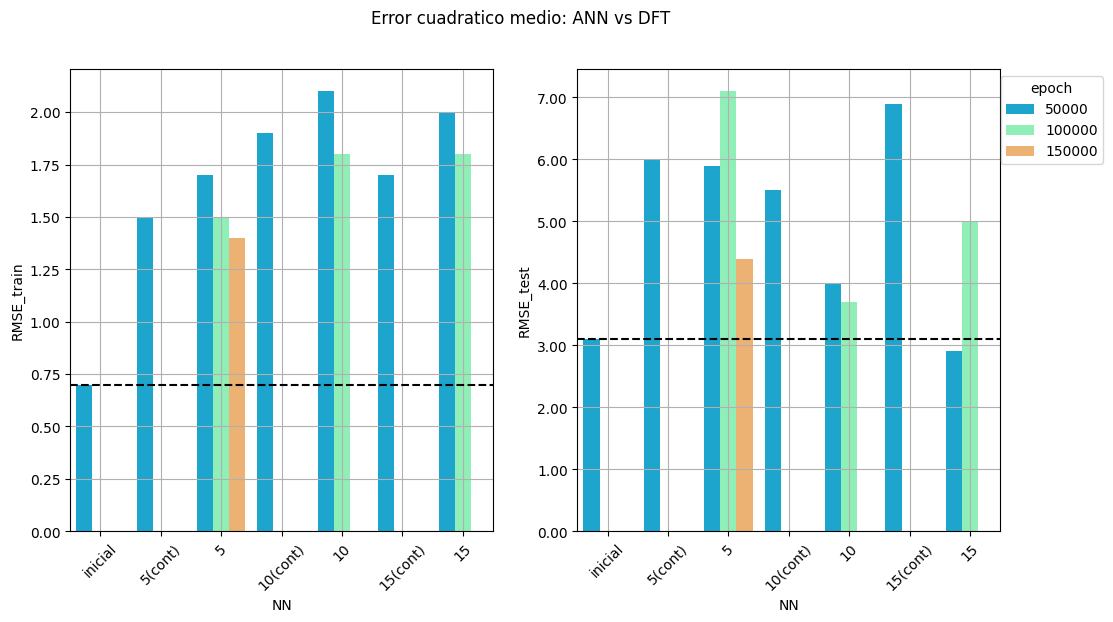

In [5]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0] = plot_RSME('RMSE_train', ax[0])
ax[1] = plot_RSME('RMSE_test' , ax[1])
plt.legend(loc='upper right',bbox_to_anchor=(1.26,1), title='epoch')
plt.suptitle('Error cuadratico medio: ANN vs DFT')
plt.show()

PRUEBA #TODO

NameError: name 'NN' is not defined

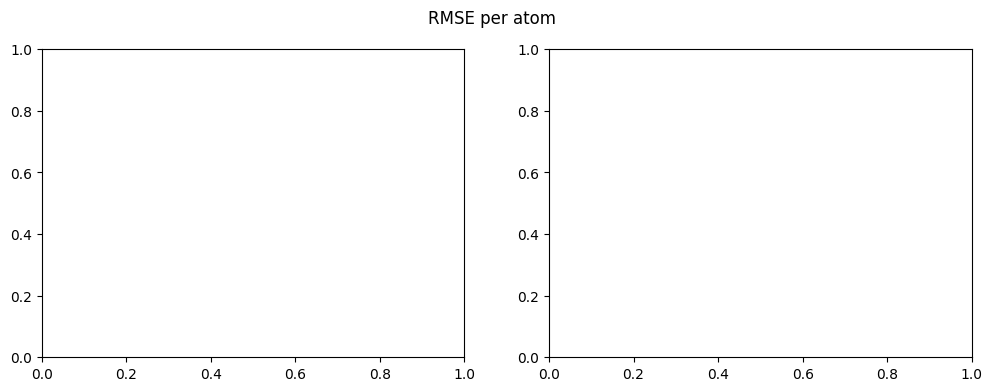

In [6]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
fig.suptitle('RMSE per atom')
axes[0].plot(NN.index, NN['RMSE [meV/atom] train'],label='train', linestyle = '--', marker = 'o') 
axes[1].plot(NN.index, NN['RMSE [meV/atom] test'], label=' test', linestyle = '--', marker = 'o')
#sns.scatterplot(ax=axes[0],data=NN, x=NN.index, y="RMSE [meV/atom] train", hue="newConf", size="newConf")
axes[0].set_ylabel('Train $[meV/atom]$')
axes[0].set_xlabel('NN')
axes[0].legend(loc='upper left')
#sns.scatterplot(ax=axes[1],data=NN, x=NN.index, y="RMSE [meV/atom] test", hue="newConf", size="newConf")
axes[1].legend(loc='upper left')
axes[1].set_xlabel('NN')
axes[1].set_ylabel('Test $[meV/atom]$')
fig.tight_layout()
fig.savefig('RMSE.png') 
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=False)
fig.suptitle('RMSE Total')
axes[0].plot(NN.index, NN['RMSE tot [meV] train'],label='train', linestyle = '--', marker = 'o') 
axes[1].plot(NN.index, NN['RMSE tot [meV] test'], label=' test', linestyle = '--', marker = 'o')
axes[0].set_ylabel('Train $[meV]$')
axes[0].set_xlabel('NN')
axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')
axes[1].set_xlabel('NN')
axes[1].set_ylabel('Test $[meV]$')
fig.tight_layout()